In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras as k
from keras.applications.vgg16 import VGG16
from keras import models
from keras import layers
# from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

In [2]:
def plot_history(hst):
    plt.figure(figsize=(13,4))

    plt.subplot(1,2,1)
    plt.plot(hst.history['loss'],label='train')
    plt.plot(hst.history['val_loss'],label='test')
    plt.title("Loss")

    plt.subplot(1,2,2)
    plt.plot([round(100*e,2) for e in hst.history['accuracy']], label = 'train')
    plt.plot([round(100*e,2) for e in hst.history['val_accuracy']], label = 'test')
    plt.title("Accuracy")

    plt.ylim(0,100)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [73]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000,28,28,1)) # to fixate that we have only 1 color
test_images = test_images.reshape((10000,28,28,1))

train_images = train_images.astype('float32')/255 #normilize data
test_images = test_images.astype('float32')/255 #normilize data

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [80]:
def add_padding(images, padding_width=2):
    num_images = images.shape[0]
    height, width, channels = images.shape[1], images.shape[2], images.shape[3]
    padded_height = height + 2 * padding_width
    padded_width = width + 2 * padding_width

    padded_images = np.zeros((num_images, padded_height, padded_width, channels), dtype=images.dtype)

    # Place the original images in the center of the new array
    padded_images[:, padding_width:padding_width + height, padding_width:padding_width + width, :] = images

    return padded_images

# Add padding. from 28*28 -> 32*32
train_images_pad = add_padding(train_images, padding_width=3)
test_images_pad = add_padding(test_images, padding_width=3)


In [81]:
train_images_pad[0].shape

(34, 34, 1)

In [95]:
epochs = 20
batch_size = 128

n_hidden_1 = 128
activation_function_l1 = 'relu'
activation_output = 'softmax'

optimizer = 'adam' #'rmsprop'
loss_func = "categorical_crossentropy"
metrics = "accuracy"

# learning_rate = 0.0005
# optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# initial_learning_rate = 1e-3
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate,
#     decay_steps=100000,
#     decay_rate=0.96,
#     staircase=True)

# optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

dropout = 0.5

In [96]:
model = models.Sequential([
    layers.Conv2D(16,(3,3),activation=activation_function_l1,input_shape=(34,34,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(32,(3,3),activation=activation_function_l1),
    layers.Conv2D(32,(3,3),activation=activation_function_l1),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation=activation_function_l1),
    layers.MaxPooling2D((2,2)),
               
    layers.Flatten(),
    layers.Dense(n_hidden_1,activation=activation_function_l1),
    layers.Dropout(dropout),
    layers.Dense(n_hidden_1,activation=activation_function_l1),
    layers.Dropout(dropout),
    layers.Dense(10,activation=activation_output),
])
model.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_100 (Conv2D)             │ (None, 32, 32, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_66 (MaxPooling2D) │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_101 (Conv2D)             │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_102 (Conv2D)             │ (None, 12, 12, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_67 (MaxPooling2D) │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_103 (Conv2D)             │ (None, 4, 4, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_68 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_28 (Flatten)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,242 (325.16 KB)

 Trainable params: 83,242 (325.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 54ms/step - accuracy: 0.5403 - loss: 1.2374 - val_accuracy: 0.8328 - val_loss: 0.4532
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.8208 - loss: 0.5074 - val_accuracy: 0.8590 - val_loss: 0.3863
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 58ms/step - accuracy: 0.8528 - loss: 0.4231 - val_accuracy: 0.8754 - val_loss: 0.3342
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - accuracy: 0.8711 - loss: 0.3713 - val_accuracy: 0.8657 - val_loss: 0.3543
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.8813 - loss: 0.3368 - val_accuracy: 0.8913 - val_loss: 0.3052
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - accuracy: 0.8937 - loss: 0.3063 - val_accuracy: 0.9009 - val_loss: 0.2745
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 51ms/step - accuracy: 0.8992 - loss: 0.2877 - val_accuracy: 0.9028 - val_loss: 0.2760
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 58ms/step - accuracy: 0.9053 - loss: 0.2746 - 

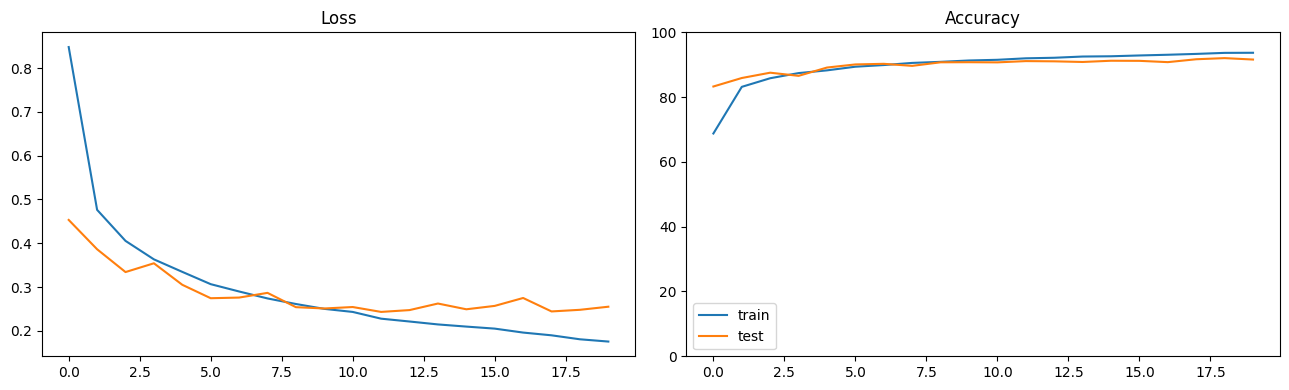

In [97]:
model.compile(
    optimizer= optimizer,
    loss=loss_func,
    metrics=[metrics]
)

history = model.fit(
    train_images_pad, train_labels,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(test_images_pad,test_labels))

plot_history(history)

In [15]:
test_loss, test_acc = model.evaluate(test_images,test_labels)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9044 - loss: 0.2775
0.906000018119812


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


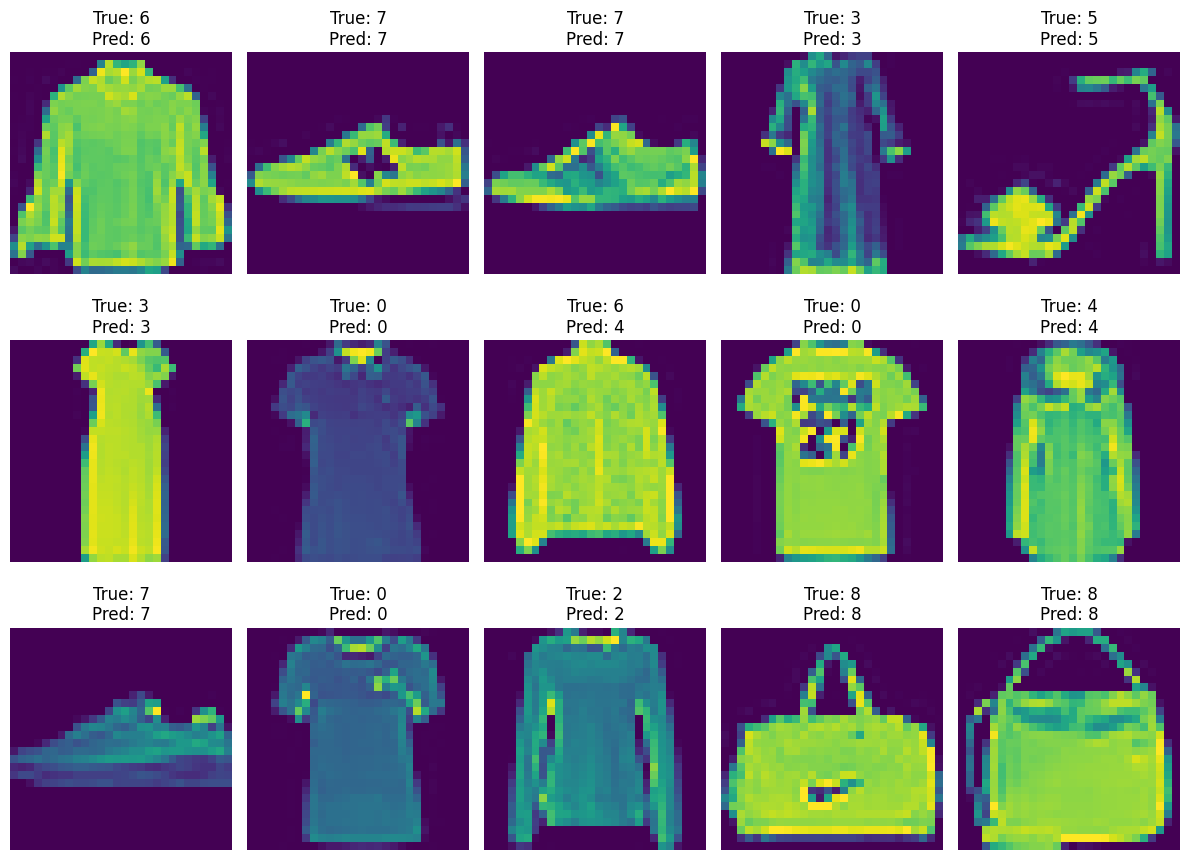

In [16]:
import numpy as np
import matplotlib.pyplot as plt

rows = 3

random_indices = np.random.choice(len(test_images), rows*5, replace=False)
random_images = test_images[random_indices]
random_labels = test_labels[random_indices]


# Make predictions
predictions = model.predict(random_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(random_labels, axis=1)  # Convert one-hot encoded labels to class indices

def plot_random_predictions(images, true_labels, pred_labels, num_rows = 3, num_images=15):
    plt.figure(figsize=(12, num_rows * 3))
    
    for i in range(num_images):
        plt.subplot(num_rows, 5, i + 1)
        plt.imshow(images[i])  # Display image
        plt.title(f'True: {true_labels[i]}\nPred: {pred_labels[i]}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize 15 images with their predictions
plot_random_predictions(random_images, true_labels, predicted_labels)